In [1]:
import os
os.getcwd()

'/workspace/Assignment 15'

In [2]:
!ls

'Create Data (1).ipynb'       __pycache__	 loss.py	   train.py
 DataLoader.ipynb	      data		 maskoverlay.zip   validate.py
'Dice Loss Small (1).ipynb'   data_producer.py	 model.py	   visualize.py
 Segmentation.ipynb	      dice_loss.py	 overlay.zip
 Validate.ipynb		      lean_model.py	 runs


In [3]:
import torch
torch.cuda.empty_cache()

In [4]:
from pathlib import Path

root_folder = Path.cwd()

In [5]:
import torch
cuda_check = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_check else "cpu")

In [6]:
print(device)

cuda:0


In [7]:
print(root_folder)

/workspace/Assignment 15


In [8]:
from torchvision.transforms import transforms
from torchvision.transforms import ColorJitter

transform = transforms.Compose([
#                                 transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                                transforms.ToTensor(),
])

In [9]:
from torchvision.transforms import transforms
from pathlib import Path
data_folder = root_folder / 'data'
train_folder = data_folder / 'train'
# test_folder = data_folder / 'test1'
validate_folder = data_folder / 'validate'
weights_folder = data_folder / 'weights'


In [10]:
import data_producer as dp
import model as md
import train
import test
import validate
import visualize as viz
import dice_loss as dl
import loss
import lean_model

In [11]:
validate_set = dp.DataProducer(validate_folder, transform)

In [12]:
# train_set = dp.DataProducer(train_folder, transform)

In [13]:
from torch.utils.data import DataLoader
# train_dl = DataLoader(train_set, batch_size=512, shuffle= True, num_workers = 12)
# test_dl = DataLoader(test_set, batch_size=16, shuffle= True,num_workers = 6)
validate_dl = DataLoader(validate_set, batch_size=256, shuffle= False, num_workers = 12)

In [14]:
import torch.nn as nn
criterion = loss.calc_loss

In [15]:
model = md.ResNetUNet(n_class=1)
# model = lean_model.Unet()
model = model.to(device)

In [16]:
saved_weight = weights_folder / 'epoch-380weights.pth'
print(saved_weight)

/workspace/Assignment 15/data/weights/epoch-380weights.pth


In [17]:
model.load_state_dict(torch.load(saved_weight))

<All keys matched successfully>

In [18]:
from torchsummary import summary
summary(model, input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,792
              ReLU-2           [-1, 64, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          36,928
              ReLU-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 32, 32]           9,408
            Conv2d-6           [-1, 64, 32, 32]           9,408
       BatchNorm2d-7           [-1, 64, 32, 32]             128
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
             ReLU-10           [-1, 64, 32, 32]               0
        MaxPool2d-11           [-1, 64, 16, 16]               0
        MaxPool2d-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
           Conv2d-14           [-1, 64,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Validation -  -- Time Taken -  3.806626796722412


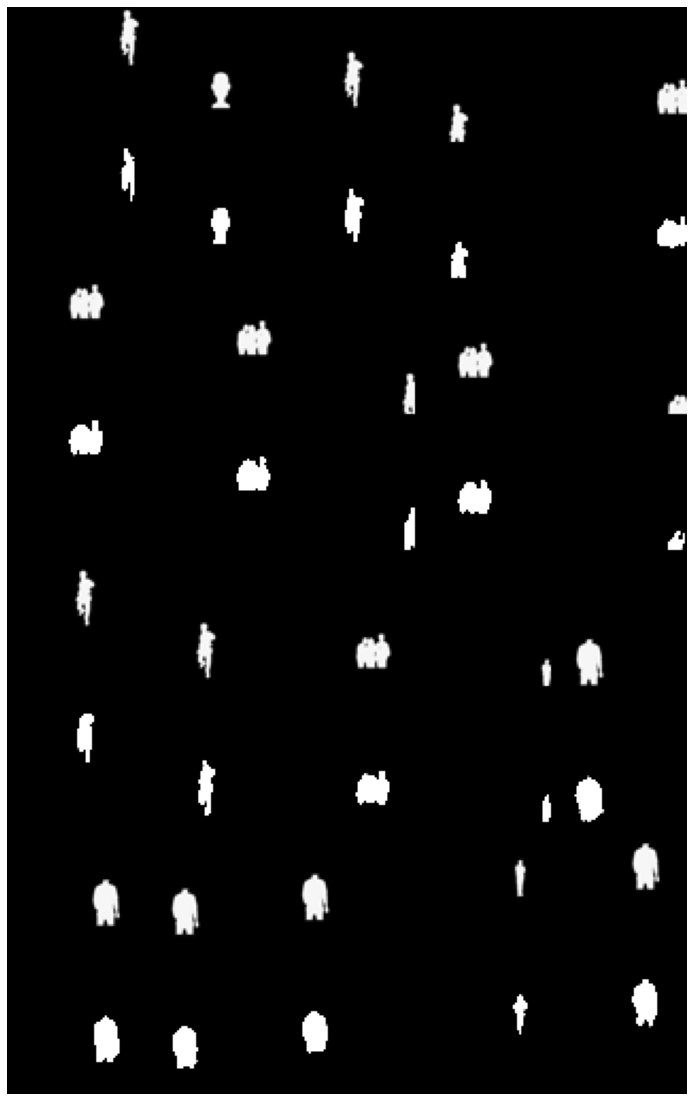

In [19]:
import time

start = time.time()
validate.validate(model, criterion, device, validate_dl)
end = time.time()

print('Validation - ', '-- Time Taken - ', str(end - start) )